<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/05_CompterVision/03_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face & Object Detection
Face and object detection in OpenCV is about automatically locating and drawing bounding boxes around specific things (like faces, cars, or dogs) in an image. It can be done using old-school methods like Haar cascades or modern deep learning models like SSD and YOLO.

## Viola-Jones Face Detection

* **Viola-Jones** detects faces in 4 main steps:

1. **Haar-like features**: adjacent rectangular regions whose value is the difference of summed pixel intensities. A sliding window of size *N* is used; although only \~5 base feature types exist, their positions and scales generate thousands of possible features. Each window can thus be represented by many features.
2. **Integral image**: speeds up computation by letting any rectangular sum be calculated in constant time instead of summing pixels manually.
3. **AdaBoost**: selects the most discriminative features from the huge pool. These features act as weak learners, and AdaBoost combines them into a strong classifier.
4. **Cascade classifier**: applies these learned features in stages. Non-face regions are quickly rejected in early stages, while only promising windows pass through deeper stages.

* **Detection phase**: the trained classifier slides across the image at multiple scales. For each window, Haar features are computed and passed through the cascade. Windows marked as faces are then refined using **non-maximum suppression** to remove duplicates.


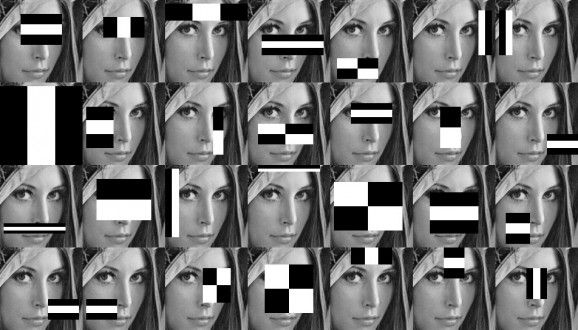

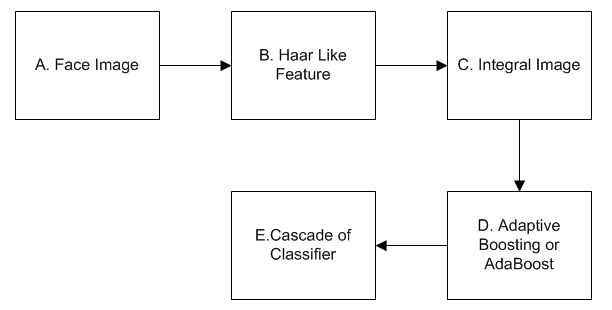



In [74]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

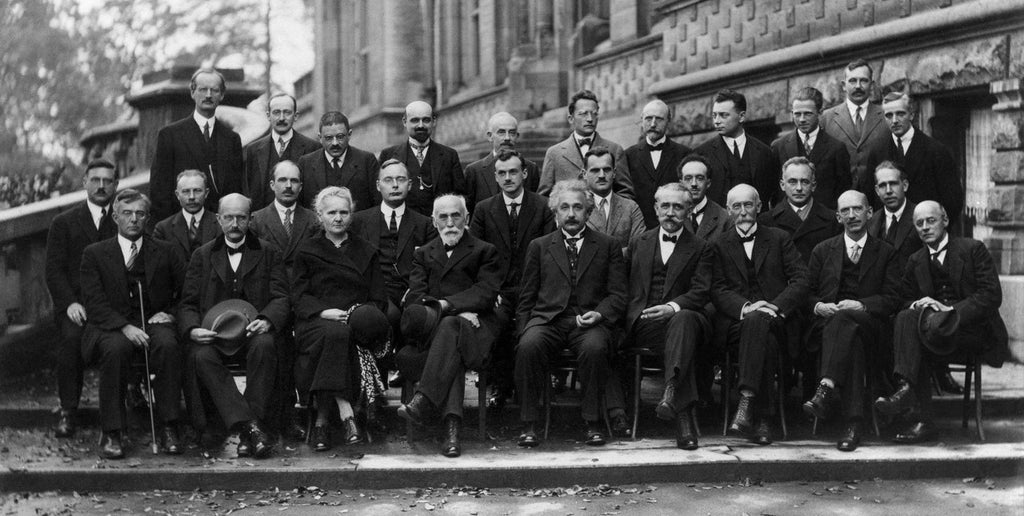

In [75]:
img = cv2.imread('/content/solvay.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [76]:
# Load Haar Cascade for face detection
# OpenCV ships with pretrained cascades
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [77]:
# Detect faces
faces = haar_cascade.detectMultiScale(
    gray,
    scaleFactor=1.035,
    minNeighbors=5,
    minSize=(30, 30)
)

print(f"Found {len(faces)} face(s)")

Found 28 face(s)


In [78]:
faces[0]

array([842,  68,  33,  33], dtype=int32)

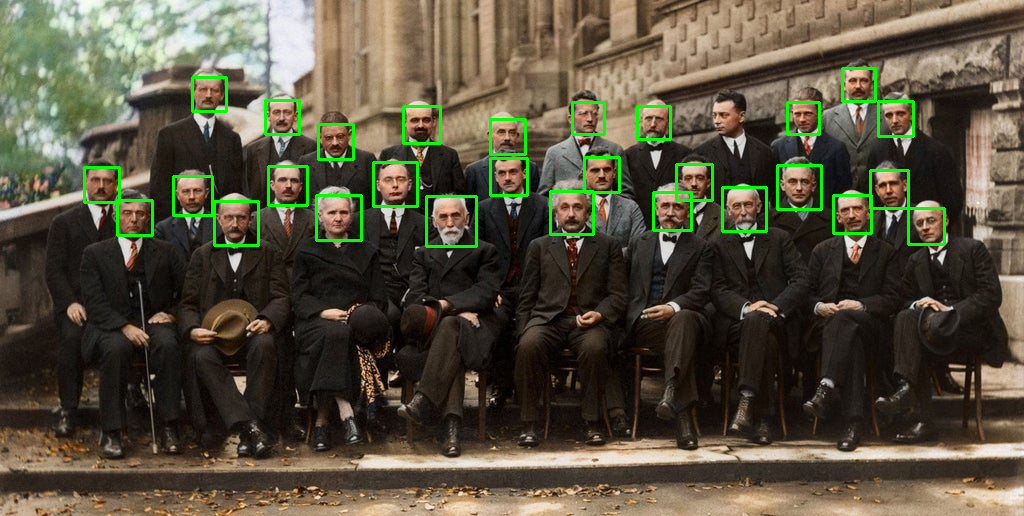

In [79]:
# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(img)

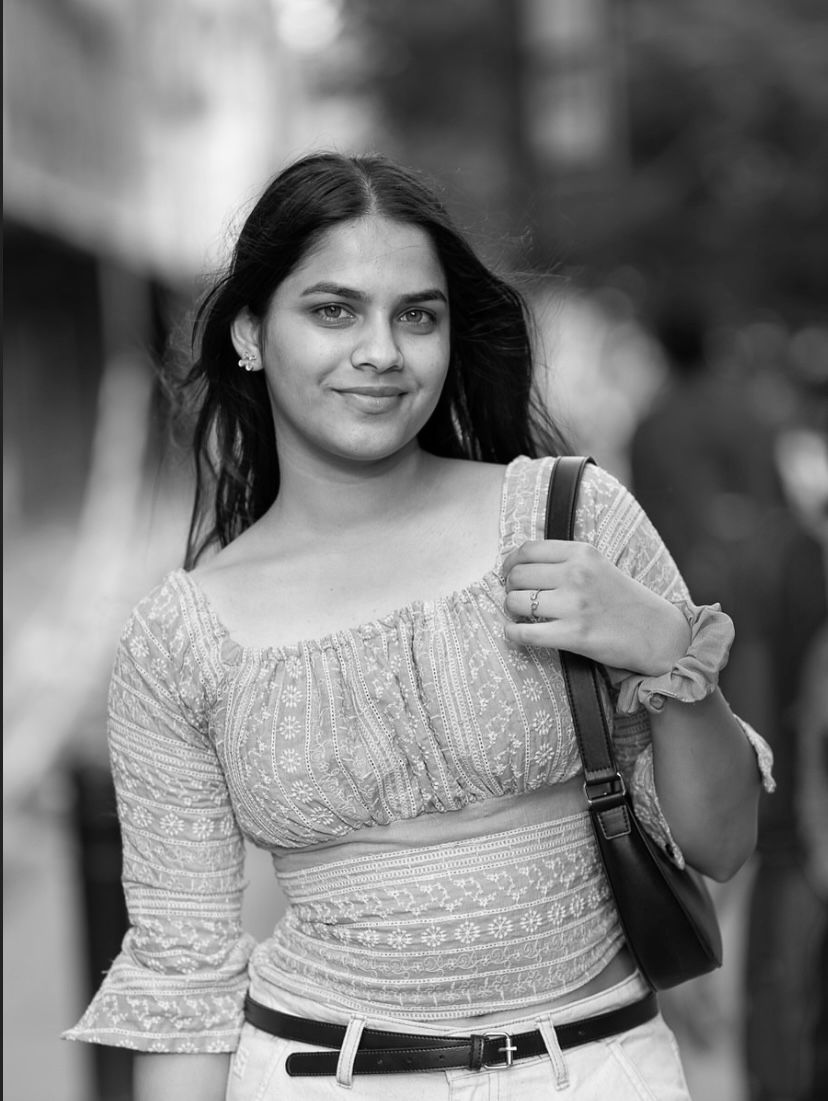

In [80]:
img2=cv2.imread('/content/WhatsApp Image 2025-08-22 at 10.08.50 PM (1).jpeg')
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray2)

In [81]:
faces2 = haar_cascade.detectMultiScale(
    gray2,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

In [82]:
print(len(faces2))

1


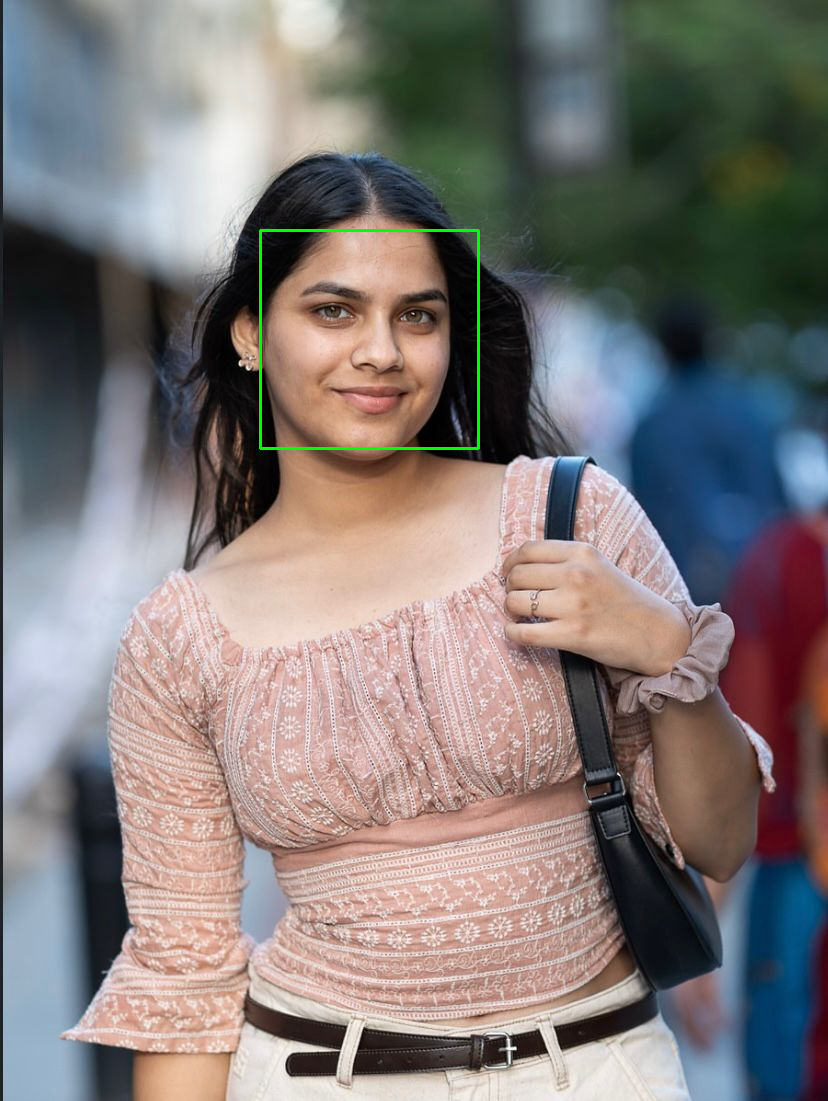

In [83]:
for (x, y, w, h) in faces2:
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(img2)

In [84]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
lip_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")

In [85]:
faces = face_cascade.detectMultiScale(gray2, 1.1, 5) #scale 1.1, minneighbours = 5 (safe checking)

for (x, y, w, h) in faces:
    # Draw face box
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Region of Interest (face region)
    roi_gray = gray2[y:y+h, x:x+w]
    roi_color = img2[y:y+h, x:x+w]

    # Detect eyes in face ROI
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 10)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)

    # Detect lips (smile) in face ROI
    lips = lip_cascade.detectMultiScale(roi_gray, 1.7, 20)
    for (lx, ly, lw, lh) in lips:
        cv2.rectangle(roi_color, (lx, ly), (lx+lw, ly+lh), (0, 0, 255), 2)

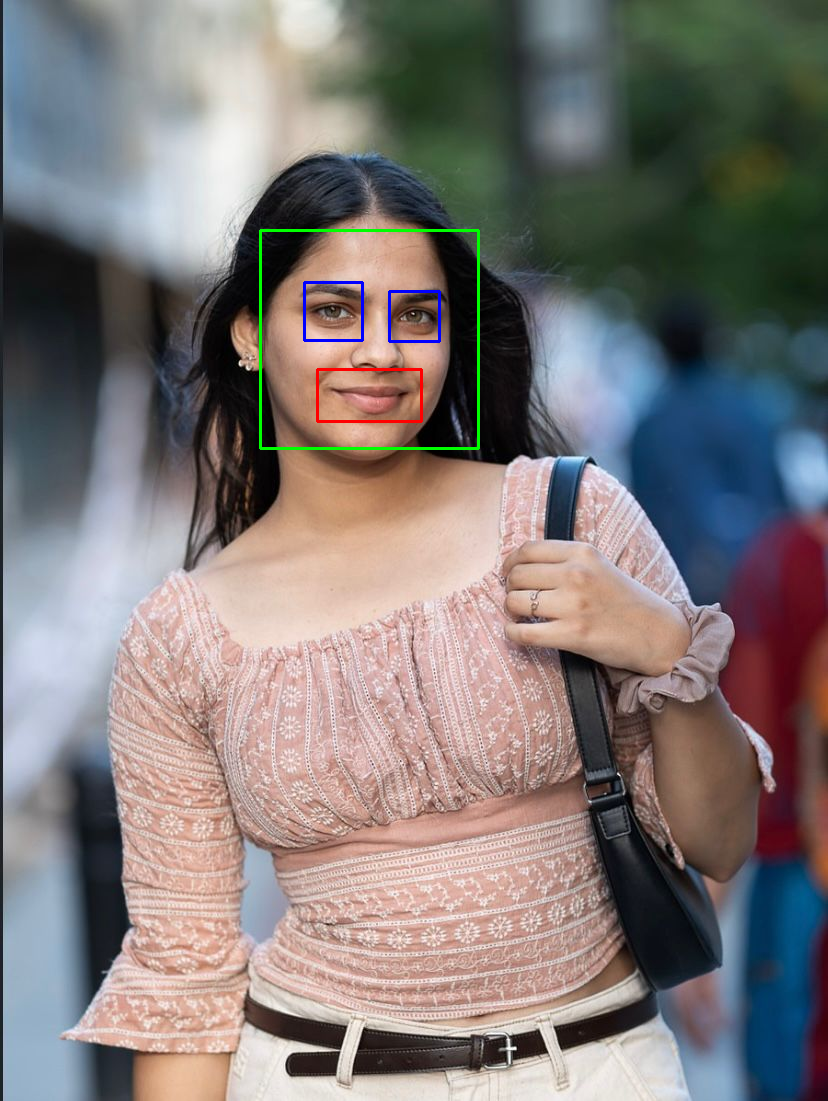

In [86]:
cv2_imshow(img2)